In [1]:
import numpy as np
import pandas as pd
import json

########################SET folder to path of code directory in the project folder#####################
## SET PATH to code directory in the project folder
code_path = "C:\\Users\\evdoxiataka\\codes\\effi_user_study_1\\code\\"
import sys  
sys.path.insert(1, code_path)

########################SET folder to project directory path#####################
folder="C:\\Users\\evdoxiataka\\codes\\effi_user_study_1\\"

from utils.utils import *
from utils.visualization import *

import matplotlib
import matplotlib.pyplot as plt

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

sensitive_attrs = ["CODE_GENDER","NAME_FAMILY_STATUS","AGE"]
all_attributes = list(attributes_names_mapping.keys())
# all_attributes.remove("CODE_GENDER")
# all_attributes.remove("NAME_FAMILY_STATUS")
# all_attributes.remove("AGE")
# sensitive_attrs = sensitive_attrs+all_attributes
fs = 0.5

##
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']

##
group_fair = ['DemographicParityRatio',
              'ConditionalDemographicDisparity',
              'EqualOpportunityDifference',
              'AverageOddsDifference',
              'PredictiveParity']
group_fair_codes = ['DPR','CDD','EOD','AOD','PPD']
indiv_fair = ['consistency_10','theil_index']

# Global Model

## Labels ('fair'+'unfair')

In [2]:
df_group_global_ap1 = pd.read_csv(folder+'data/results/global/Labels/group_fairness_global-Labels.csv', delimiter=',')
df_indiv_global_ap1 = pd.read_csv(folder+'data/results/global/Labels/individual_fairness_global-Labels.csv', delimiter=',')
df_acc_global_ap1 = pd.read_csv(folder+'data/results/global/Labels/accuracy_global-Labels.csv', delimiter=',')

perc_change_df1 = get_percentage_change_oneoff(df_group_global_ap1, group_fair, 
                                            df_indiv_global_ap1, indiv_fair, 
                                             df_acc_global_ap1,
                                            all_attributes, fs)
##
perc_change_df1.to_csv(folder+"data/results/global/Labels/perc_change_global-Labels.csv", index=False)
# perc_change_df

## Labels ('unfair') 

In [3]:
df_group_global_ap2 = pd.read_csv(folder+'data/results/global/Labels_Unfair/group_fairness_global-Labels_Unfair.csv', delimiter=',')
df_indiv_global_ap2 = pd.read_csv(folder+'data/results/global/Labels_Unfair/individual_fairness_global-Labels_Unfair.csv', delimiter=',')
df_acc_global_ap2 = pd.read_csv(folder+'data/results/global/Labels_Unfair/accuracy_global-Labels_Unfair.csv', delimiter=',')

perc_change_df2 = get_percentage_change_oneoff(df_group_global_ap2, group_fair, 
                                            df_indiv_global_ap2, indiv_fair, 
                                             df_acc_global_ap2,
                                            all_attributes, fs)
##
perc_change_df2.to_csv(folder+"data/results/global/Labels_Unfair/perc_change_global-Labels_Unfair.csv", index=False)
# perc_change_df2

## Labels+Weights ('fair'+'unfair')

In [5]:
df_group_global_ap3 = pd.read_csv(folder+'data/results/global/Labels+Weights/group_fairness_global-Labels+Weights.csv', delimiter=',')
df_indiv_global_ap3 = pd.read_csv(folder+'data/results/global/Labels+Weights/individual_fairness_global-Labels+Weights.csv', delimiter=',')
df_acc_global_ap3 = pd.read_csv(folder+'data/results/global/Labels+Weights/accuracy_global-Labels+Weights.csv', delimiter=',')

perc_change_df3 = get_percentage_change_oneoff(df_group_global_ap3, group_fair, 
                                            df_indiv_global_ap3, indiv_fair, 
                                             df_acc_global_ap3,
                                            all_attributes, fs)
##
perc_change_df3.to_csv(folder+"data/results/global/Labels+Weights/perc_change_global-Labels+Weights.csv", index=False)
# perc_change_df

# Personalized Models

## Labels ('fair'+'unfair')

In [2]:
df_group = pd.read_csv(folder+'data/results/personalized/Labels/group_fairness_personalized-Labels_with_cma.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data/results/personalized/Labels/individual_fairness_personalized-Labels_with_cma.csv', delimiter=',')
df_acc = pd.read_csv(folder+'data/results/personalized/Labels/accuracy_personalized-Labels_with_cma.csv', delimiter=',')

perc_change_df, cma_perc_change_df = get_percentage_change_IML(df_group, group_fair, 
                                                                df_indiv, indiv_fair, 
                                                                sensitive_attrs, fs)
perc_change_df.to_csv(folder+"data/results/personalized/Labels/perc_change_personalized-Labels_raw.csv", index=False)
cma_perc_change_df.to_csv(folder+"data/results/personalized/Labels/perc_change_personalized-Labels_cma.csv", index=False)

p_ids = perc_change_df['participant_id'].tolist()

### Cluster participants based on perc. change of group fairness measured at last iteration of CMA

In [ ]:
## df to array - keep only group fairness for clustering
clustered_data = []
for i in cma_perc_change_df.index:
    clustered_data.append(cma_perc_change_df.loc[i].tolist()[:-3])
metric = 'mean'

In [ ]:
## Search for optimal number of clusters
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]
silhouette_scores, best_score, best_grid = k_means_optimize_parameter(clustered_data, parameters, metric)
plot_silhouette_scores(silhouette_scores, parameters)

In [ ]:
nc = 3
cluster_ids, cluster_centroids, array_of_vectors_pca = k_means_pca(clustered_data, nc, metric, n_components=2)
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
plot_clusters(array_of_vectors_pca, cluster_ids, colors)
##
cluster_p_id_dict = {}
for i, cl_id in enumerate(cluster_ids):
    color = 'cluster_'+str(cl_id)
    if color not in cluster_p_id_dict:
        cluster_p_id_dict[color] = []
    cluster_p_id_dict[color].append((i, p_ids[i]))
cluster_p_id_dict

In [ ]:
clustered_data_df = cma_perc_change_df.copy(deep=True)
clustered_data_df.drop(columns=['consistency_10','theil_index'],inplace=True)
clustered_data_df['cluster_id'] = cluster_ids
for i,centroid in enumerate(cluster_centroids):
    centroid = centroid.tolist()
    centroid.append('centroid')
    centroid.append(i)
    clustered_data_df.loc[58+i] = centroid
clustered_data_df.to_csv(folder+"data/results/personalized/Labels/perc_change_personalized-Labels_clustering_cma.csv", index=False)

In [ ]:
for cl in cluster_p_id_dict:
    print(cl,len(cluster_p_id_dict[cl]))

#### Line plots per cluster

In [ ]:
for cl in cluster_p_id_dict:
    title = 'personalized-Labels_Clustering_CMA_Group_{}'.format(cl)
    filename = 'lineGraphs_personalized-Labels_Clustering_CMA_Group_{}'.format(cl)
    image_type = '.jpeg'
    cl_participants = [p_id[1] for p_id in cluster_p_id_dict[cl]]
    cl_participants.append(np.nan)
    print(cl, cl_participants)
    joint_plot_all_participants(title, 
                                folder+'data/results/personalized-Labels/figures/clustering/', filename, image_type, 
                                sensitive_attrs, 
                                group_fair, group_fair_codes, 
                                indiv_fair, 
                                fs, 
                                df_group.loc[df_group['participant_id'].isin(cl_participants)], 
                                df_indiv.loc[df_indiv['participant_id'].isin(cl_participants)], 
                                df_acc.loc[df_acc['participant_id'].isin(cl_participants)], 
                                colors, True, True)

#### Perc. change bar graphs per cluster

In [ ]:
## plot all fairness metrics
perc_ch_df = cma_perc_change_df
cluster_df = clustered_data_df
title = 'personalized-Labels_ Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels_Clustering_CMA_Group_cl{}.pdf'
fPath = folder+'data/results/personalized-Labels/figures/clustering/'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio',
           'ConditionalDemographicDisparity',
           'EqualOpportunityDifference',
           'AverageOddsDifference',
           'PredictiveParity']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots_per_cluster(perc_ch_df, cluster_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Perc. change bar graph of all participants

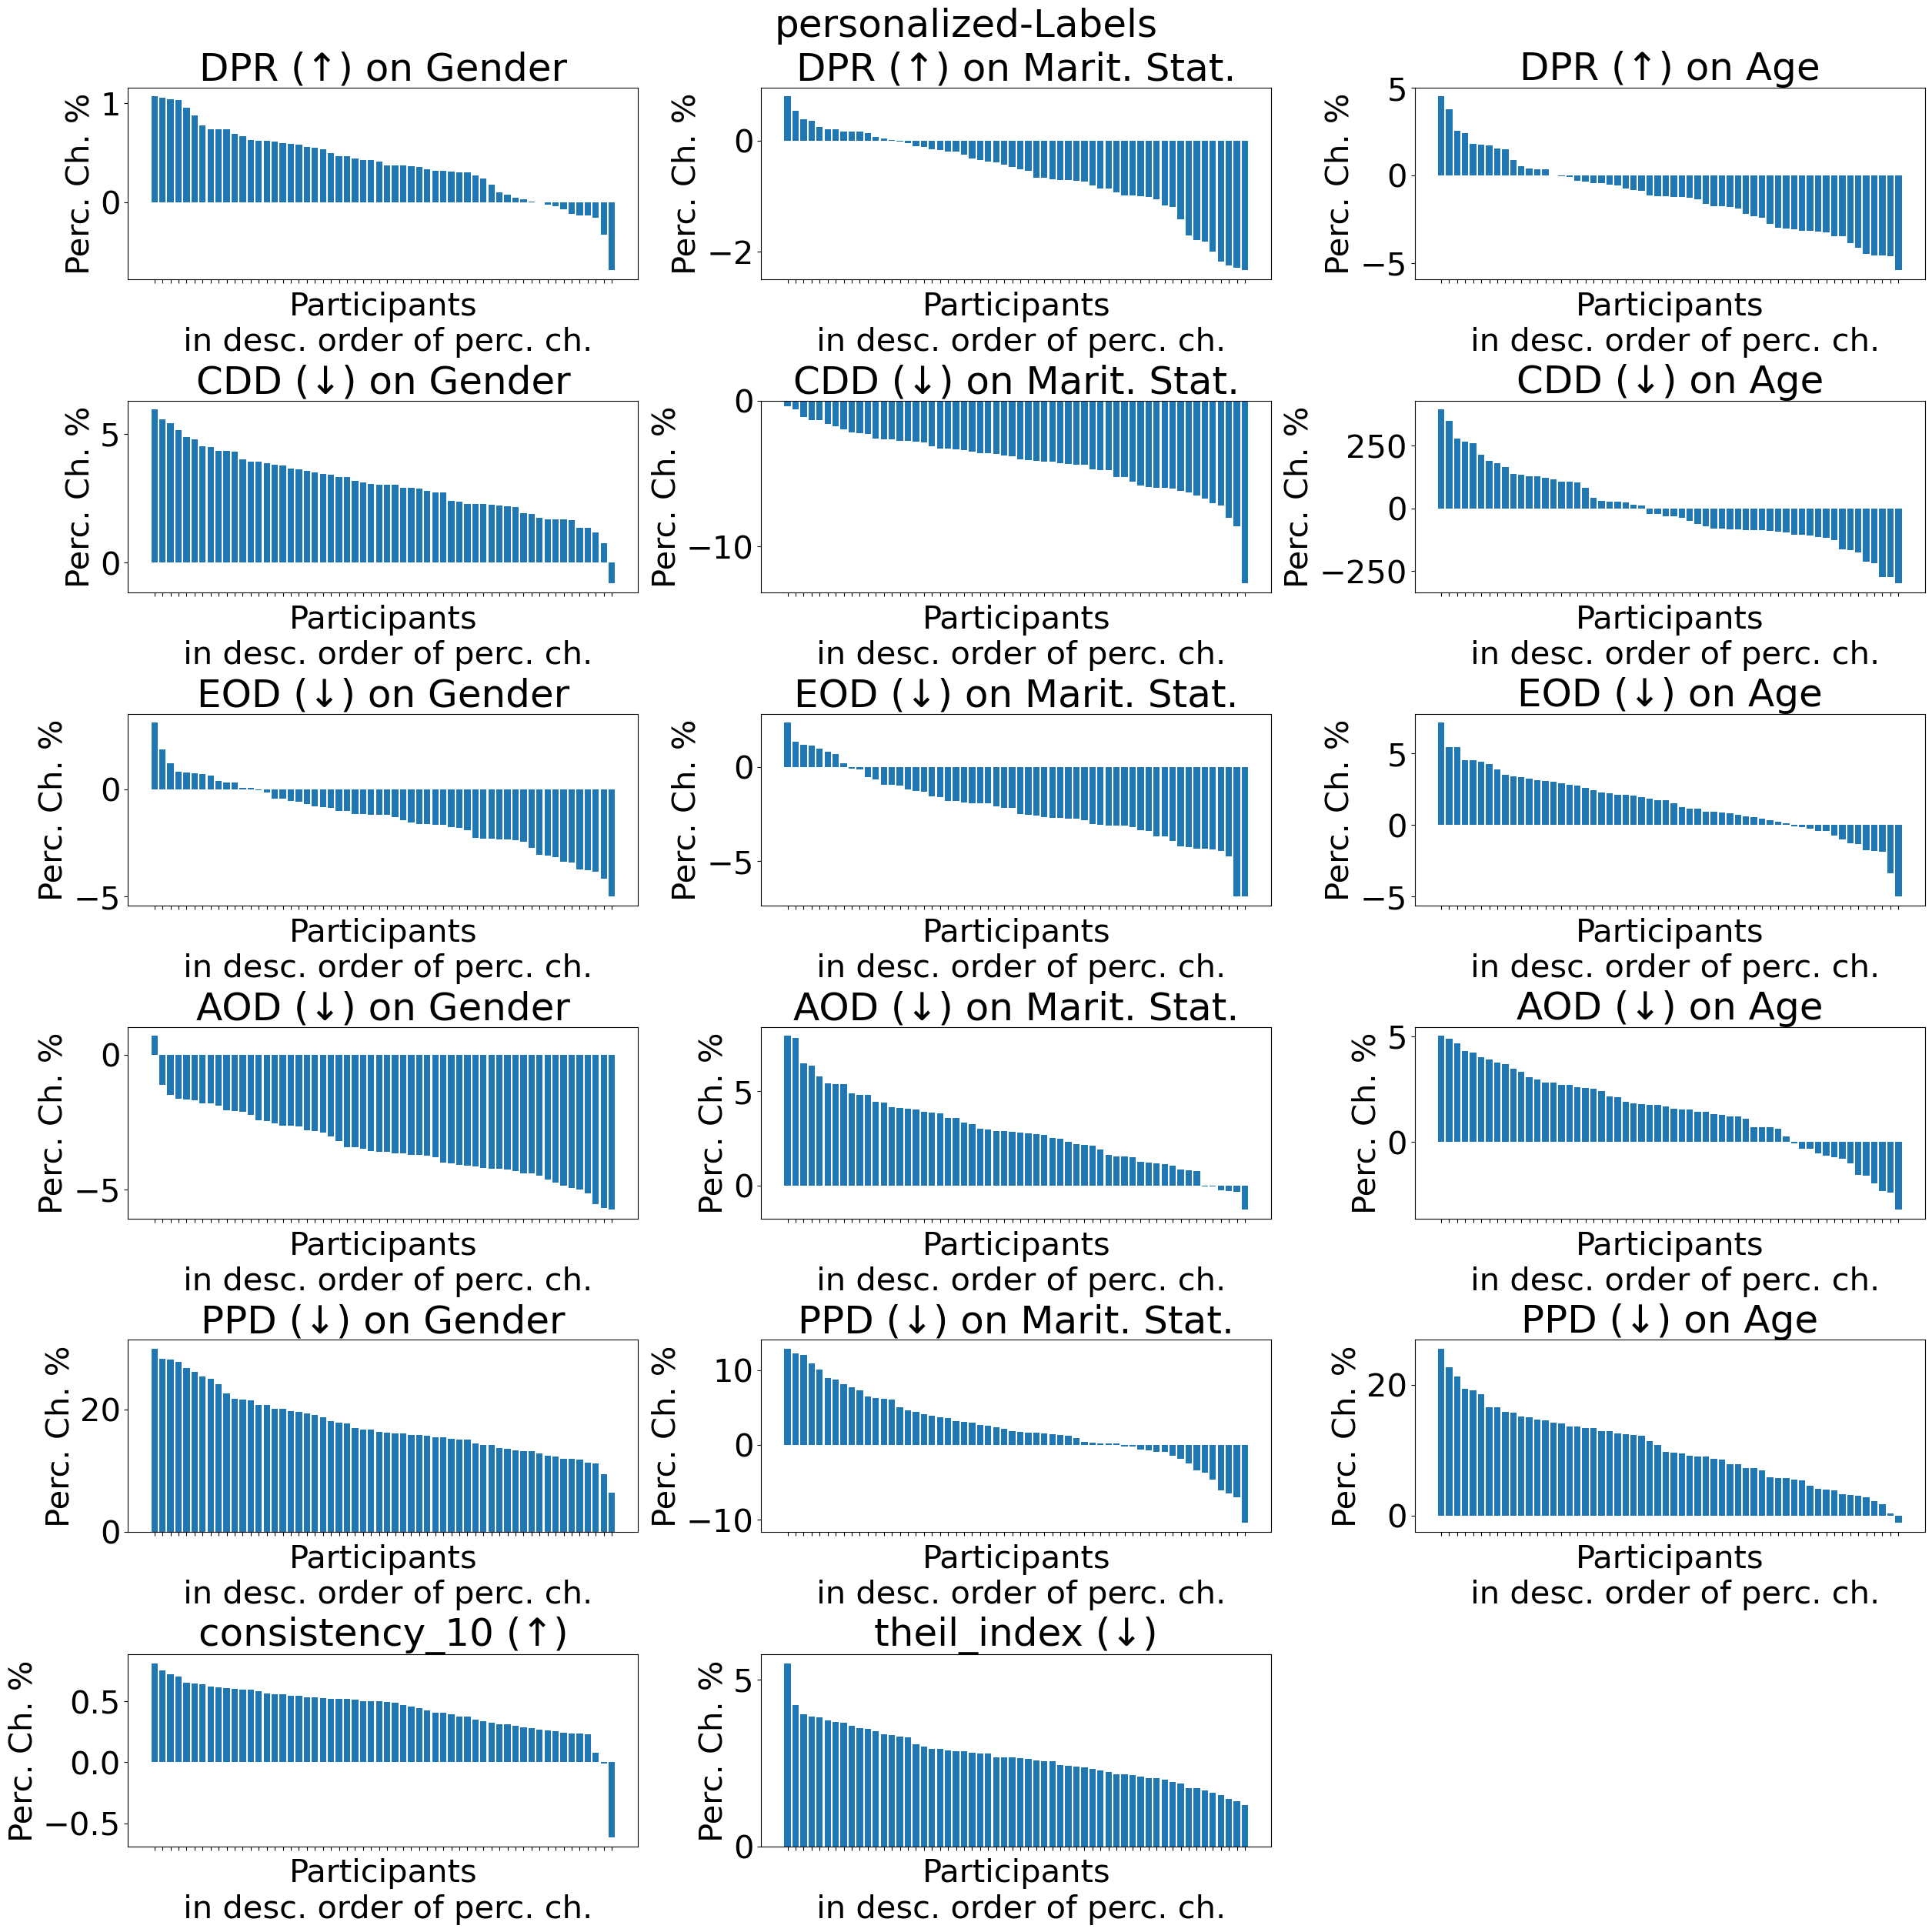

In [3]:
## plot perc. change plot for all fairness metrics
perc_ch_df = cma_perc_change_df
title = 'personalized-Labels'
file_name = 'percChange_Graphs_personalized-Labels.pdf'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','ConditionalDemographicDisparity','EqualOpportunityDifference',
                    'AverageOddsDifference','PredictiveParity','indiv.']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots(perc_ch_df, title, file_name, 
                  folder+'data/results/personalized/Labels/figures/', 
                  attrs, attrs_codes, group_f, group_fair_cod)

### Line (Raw and CMA) plots

#### Joint plot for all participants

In [ ]:
title = 'personalized-Labels_all'
image_type = '.jpeg'
filename = 'all_participants'
joint_plot_all_participants(title, 
                            folder+'data/results/personalized/Labels/figures/', filename, image_type, 
                            sensitive_attrs, 
                            group_fair, group_fair_codes, 
                            indiv_fair, 
                            fs, 
                            df_group, df_indiv, df_acc, 
                            colors, True, True)

#### Plots per participant

In [ ]:
title = 'personalized-Labels_{}'
image_type = '.jpeg'
plots_per_participant(title, 
                      folder+'data/results/personalized/Labels/figures/', 
                      image_type, 
                      sensitive_attrs, 
                      group_fair, group_fair_codes, 
                      indiv_fair, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True)

## Labels ('unfair' only)

In [2]:
df_group = pd.read_csv(folder+'data/results/personalized/Labels_Unfair/group_fairness_personalized-Labels_Unfair_with_cma.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data/results/personalized/Labels_Unfair/individual_fairness_personalized-Labels_Unfair_with_cma.csv', delimiter=',')
df_acc = pd.read_csv(folder+'data/results/personalized/Labels_Unfair/accuracy_personalized-Labels_Unfair_with_cma.csv', delimiter=',')

perc_change_df, cma_perc_change_df = get_percentage_change_IML(df_group, group_fair, 
                                                               df_indiv, indiv_fair, 
                                                               sensitive_attrs, fs)#all_attributes
perc_change_df.to_csv(folder+"data/results/personalized/Labels_Unfair/perc_change_personalized-Labels_Unfair_raw.csv", index=False)
cma_perc_change_df.to_csv(folder+"data/results/personalized/Labels_Unfair/perc_change_personalized-Labels_Unfair_cma.csv", index=False)

p_ids = perc_change_df['participant_id'].tolist()

### Cluster participants based on perc. change of group fairness measured at last iteration of CMA

In [ ]:
## df to array - keep only group fairness for clustering
perc_change_array = []
for i in perc_change_df.index:
    perc_change_array.append(perc_change_df.loc[i].tolist()[:-3])
cma_perc_change_array = []
for i in cma_perc_change_df.index:
    cma_perc_change_array.append(cma_perc_change_df.loc[i].tolist()[:-3])

##
clustered_data = cma_perc_change_array
metric = 'mean'

In [ ]:
## Search for optimal number of clusters
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]
silhouette_scores, best_score, best_grid = k_means_optimize_parameter(clustered_data, parameters, metric)
plot_silhouette_scores(silhouette_scores, parameters)

In [ ]:
nc = 3
cluster_ids, cluster_centroids, array_of_vectors_pca = k_means_pca(clustered_data, nc, metric, n_components=2)
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
plot_clusters(array_of_vectors_pca, cluster_ids, colors)
##
cluster_p_id_dict = {}
for i, cl_id in enumerate(cluster_ids):
    color = 'cluster_'+str(cl_id)
    if color not in cluster_p_id_dict:
        cluster_p_id_dict[color] = []
    cluster_p_id_dict[color].append((i, p_ids[i]))
cluster_p_id_dict

In [ ]:
clustered_data_df = cma_perc_change_df.copy(deep=True)
clustered_data_df.drop(columns=['consistency_10','theil_index'],inplace=True)
clustered_data_df['cluster_id'] = cluster_ids
for i,centroid in enumerate(cluster_centroids):
    centroid = centroid.tolist()
    centroid.append('centroid')
    centroid.append(i)
    clustered_data_df.loc[58+i] = centroid
clustered_data_df.to_csv(folder+"data/results/personalized/Labels_Unfair/perc_change_personalized-Labels_Unfair_clustering_cma_group.csv", index=False)
# clustered_data_df.to_csv("perc_change_IML-Labels_Unfair_clustering_cma_group+indiv.csv", index=False)

In [ ]:
for cl in cluster_p_id_dict:
    print(cl,len(cluster_p_id_dict[cl]))

#### Line plots per cluster

In [ ]:
for cl in cluster_p_id_dict:
    title = 'personalized-Labels_Unfair_Clustering_CMA_Group_{}'.format(cl)
    filename = 'lineGraphs_personalized-Labels_Unfair_Clustering_CMA_Group_{}'.format(cl)
    image_type = '.jpeg'
    colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
    cl_participants = [p_id[1] for p_id in cluster_p_id_dict[cl]]
    cl_participants.append(np.nan)
    print(cl, cl_participants)
    joint_plot_all_participants(title, 
                                folder+'data/results/personalized/Labels_Unfair/figures/clustering/', filename, image_type, 
                                sensitive_attrs, 
                                group_fair, group_fair_codes, 
                                indiv_fair, 
                                fs, 
                                df_group.loc[df_group['participant_id'].isin(cl_participants)], 
                                df_indiv.loc[df_indiv['participant_id'].isin(cl_participants)], 
                                df_acc.loc[df_acc['participant_id'].isin(cl_participants)], 
                                colors, True, True)

#### Perc. change graphs per cluster

In [ ]:
## plot all fairness metrics
perc_ch_df = cma_perc_change_df
cluster_df = clustered_data_df
title = 'personalized-Labels_Unfair Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels_Unfair_Clustering_CMA_Group_cl{}.pdf'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/clustering/'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio',
           'ConditionalDemographicDisparity',
           'EqualOpportunityDifference',                    
           'AverageOddsDifference',
           'PredictiveParity']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots_per_cluster(perc_ch_df, cluster_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

In [ ]:
## plot only DPR and AOD
perc_ch_df = cma_perc_change_df
cluster_df = clustered_data_df
title = 'personalized-Labels_Unfair Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels_Unfair_Clustering_CMA_Group_cl{}_short.pdf'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/clustering/'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','AOD (↓)']

perc_change_plots_per_cluster(perc_ch_df, cluster_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Perc. change plot of all participants

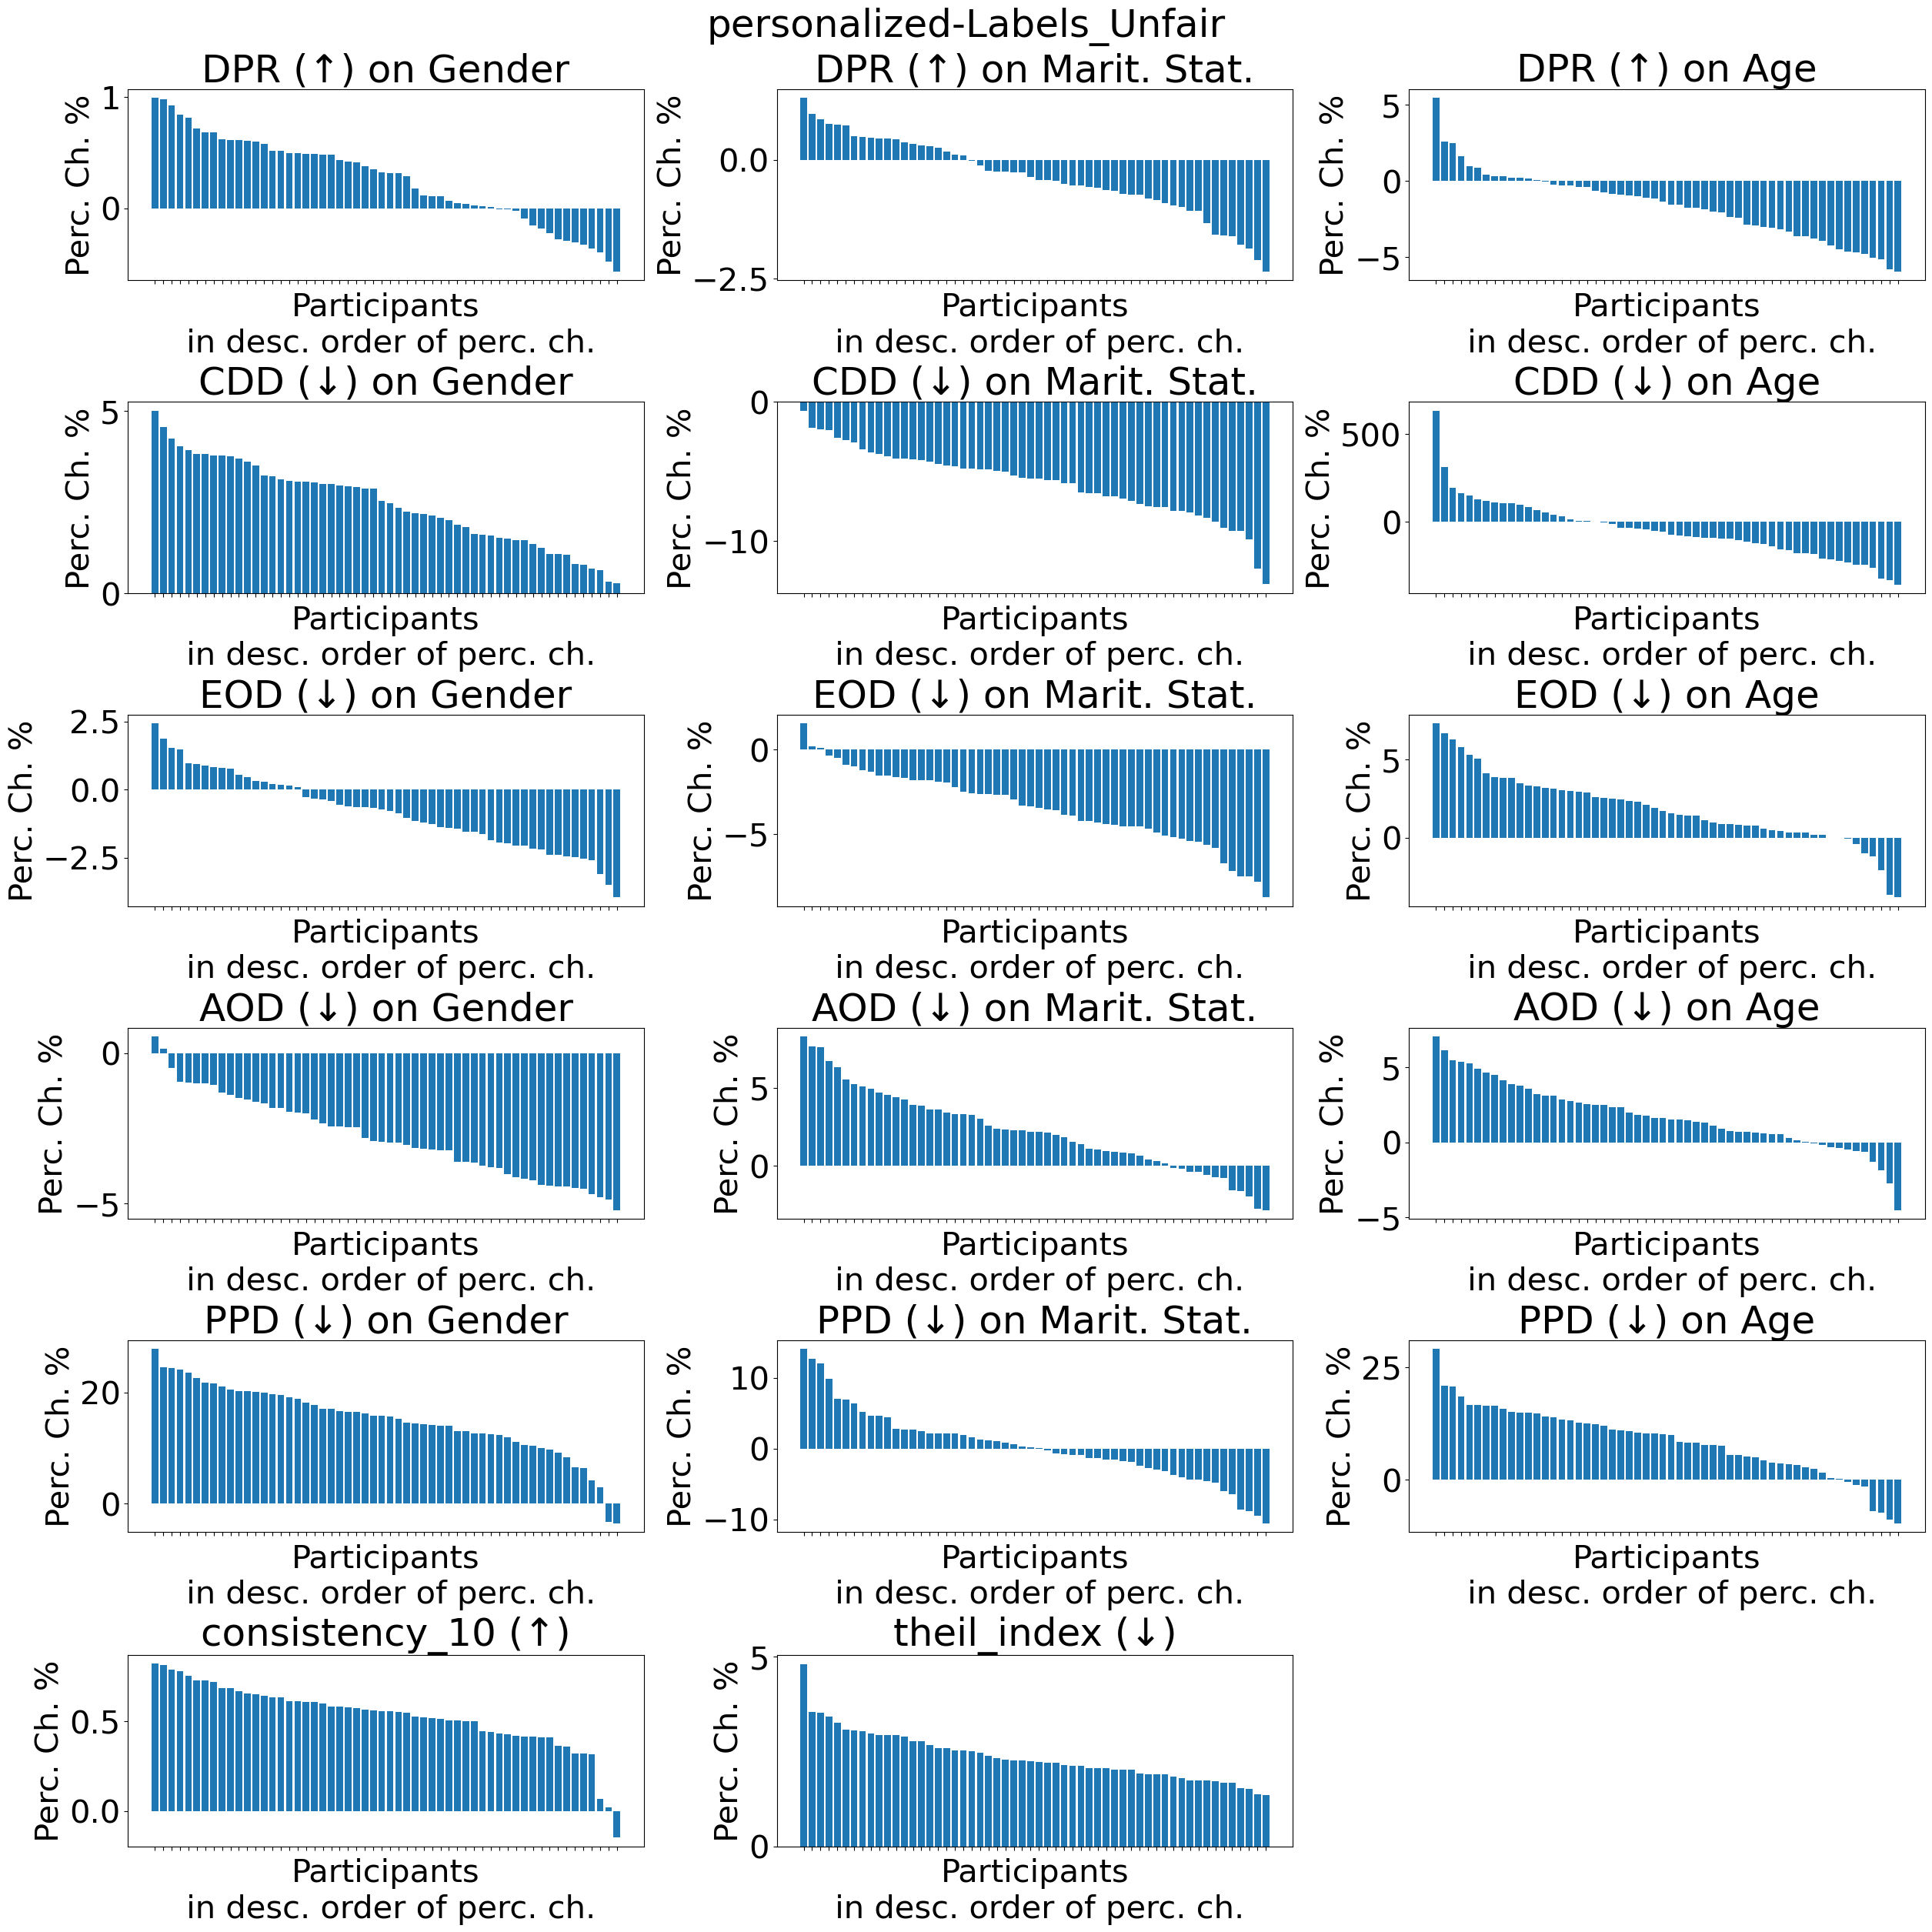

In [5]:
## plot perc. change plot for all fairness metrics
perc_ch_df = cma_perc_change_df
title = 'personalized-Labels_Unfair'
file_name = 'percChange_Graphs_personalized-Labels_Unfair.pdf'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio',
           'ConditionalDemographicDisparity',
           'EqualOpportunityDifference',
            'AverageOddsDifference',
           'PredictiveParity','indiv.']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

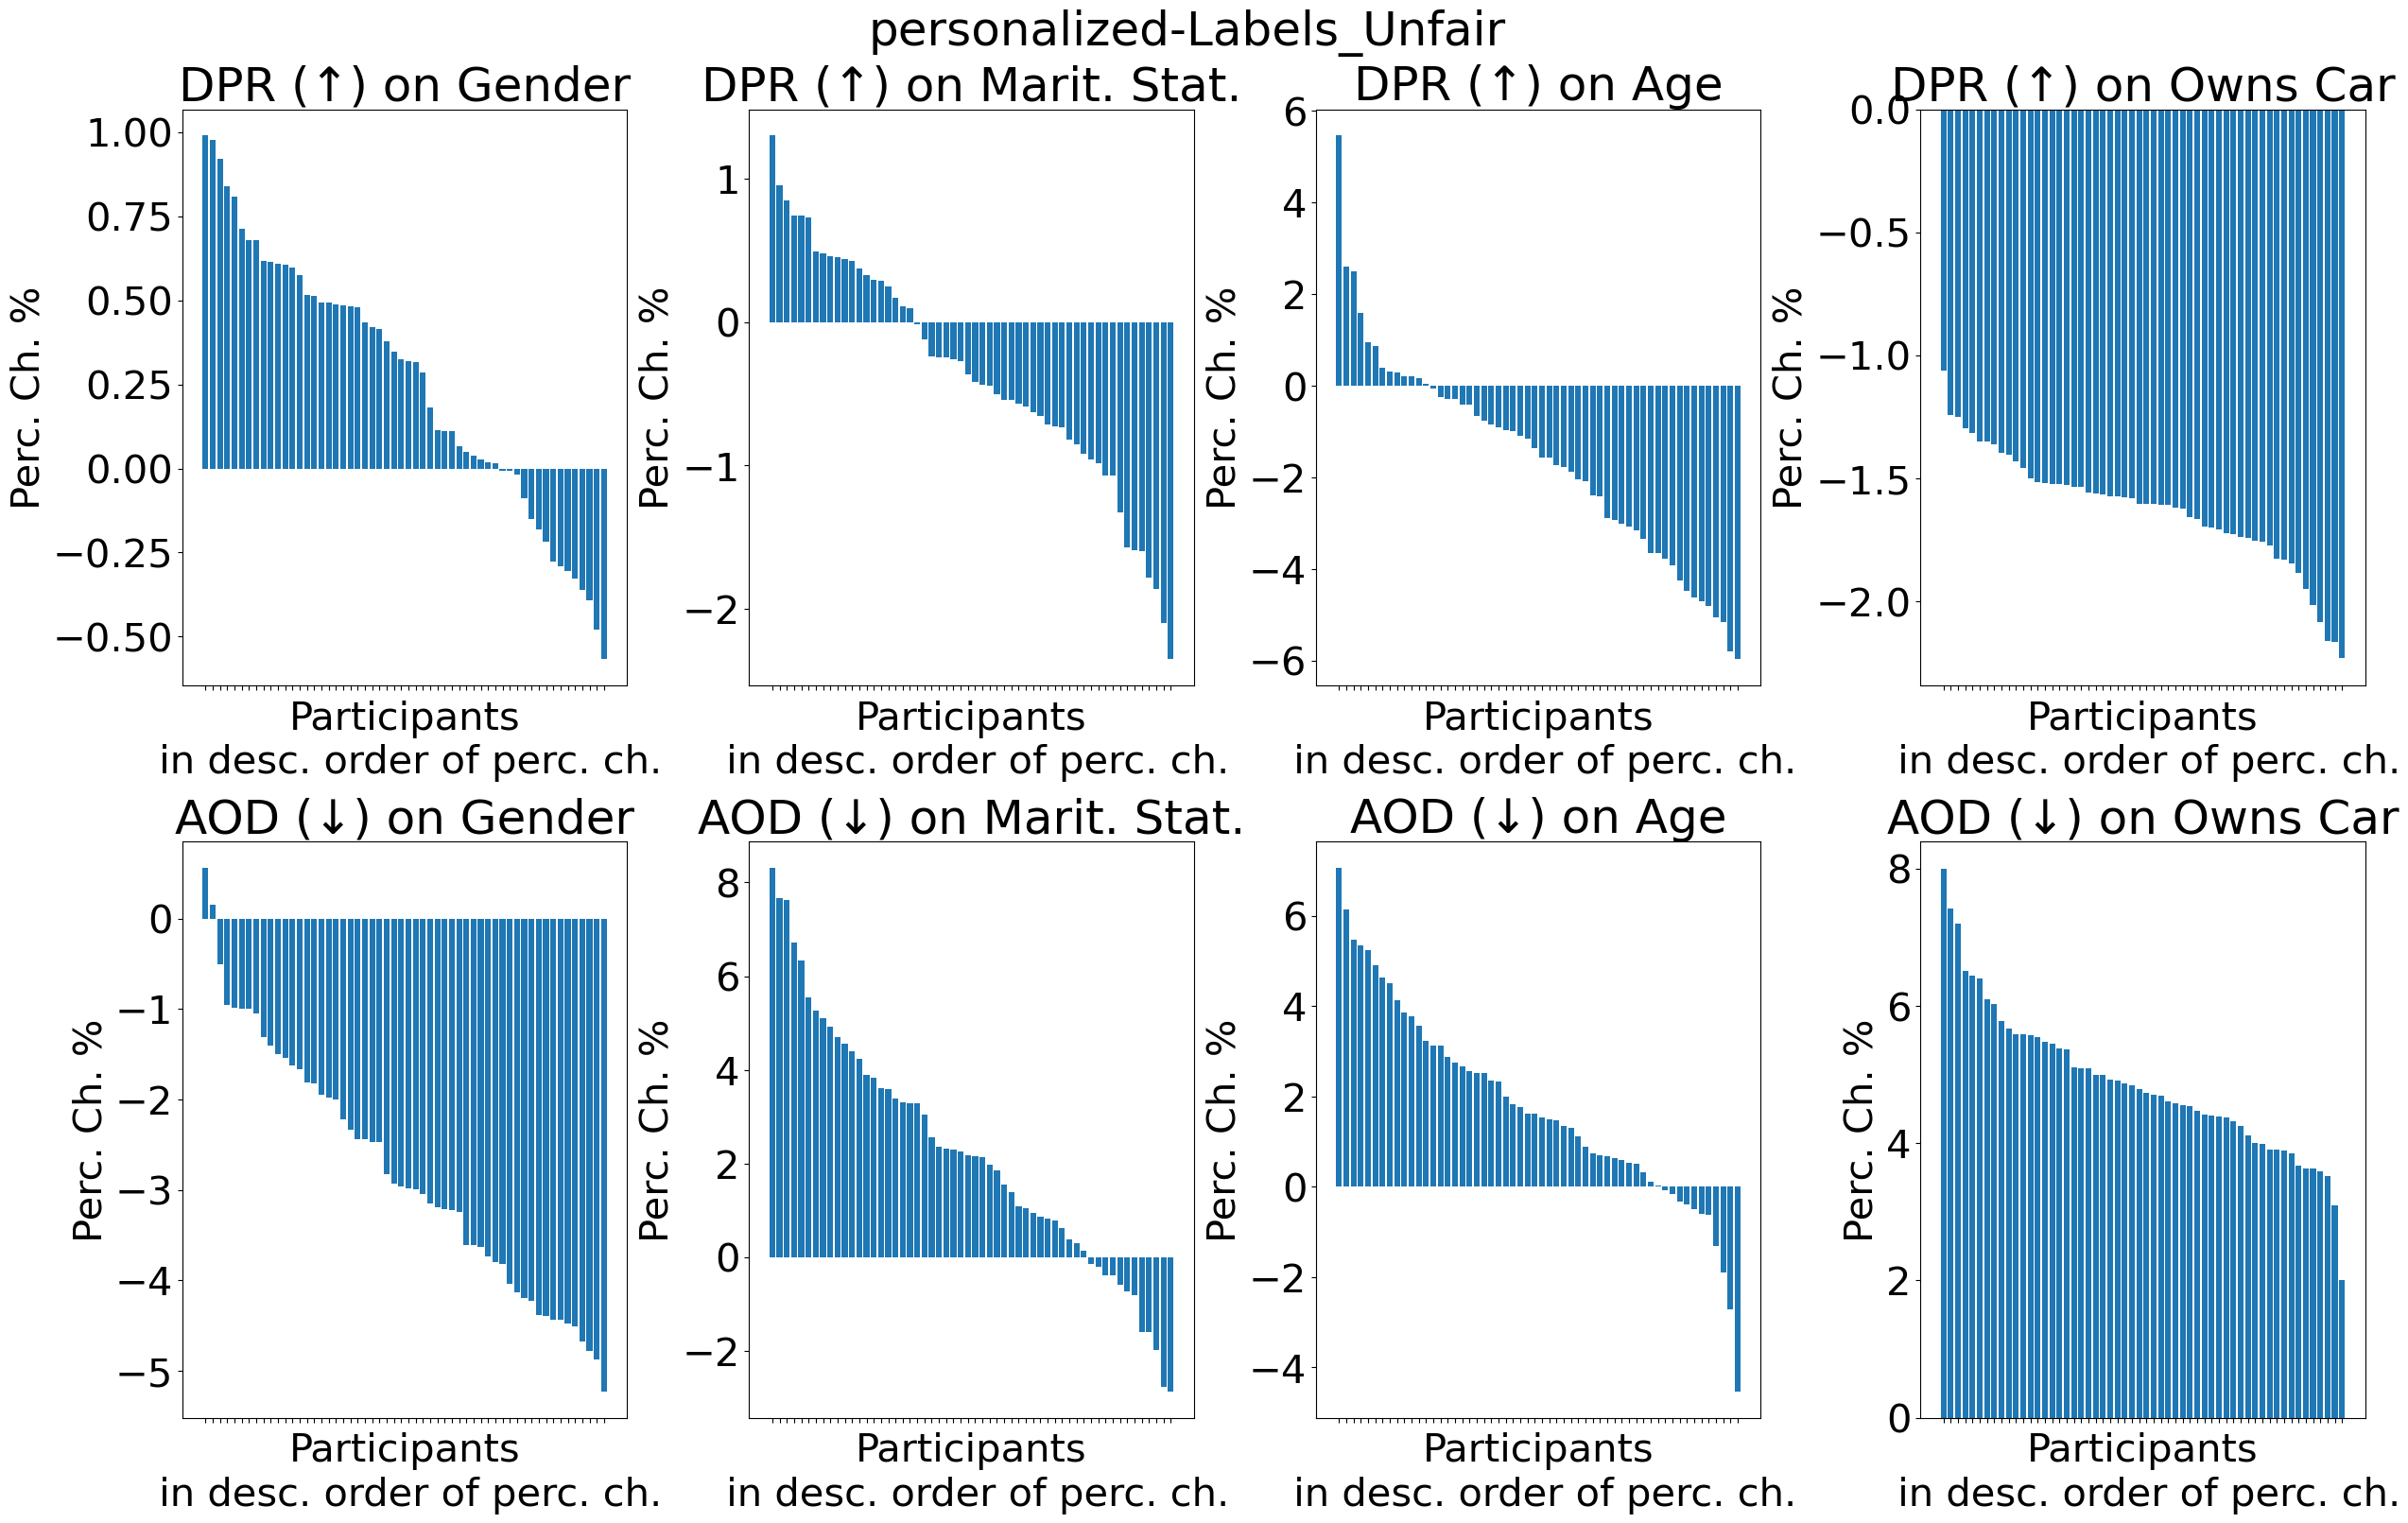

In [12]:
## plot perc. change plot for DPR and AOD
perc_ch_df = cma_perc_change_df
title = 'personalized-Labels_Unfair'
file_name = 'percChange_Graphs_personalized-Labels_Unfair_short.pdf'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE','FLAG_OWN_CAR']
attrs_codes = ['Gender','Marit. Stat.','Age','Owns Car']
group_f = ['DemographicParityRatio','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','AOD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Line (Raw and CMA) plots

#### Joint plots for all participants

In [ ]:
title = 'personalized-Labels_Unfair_all'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
image_type = '.jpeg'
filename = 'all_participants'
joint_plot_all_participants(title, fPath, filename, image_type, 
                            sensitive_attrs, 
                            group_fair, group_fair_codes, 
                            indiv_fair, 
                            fs, 
                            df_group, df_indiv, df_acc, 
                            colors, True, True)

#### Plots per participant

In [ ]:
title = 'personalized-Labels_Unfair_{}'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
image_type = '.jpeg'
plots_per_participant(title, fPath, image_type, 
                      sensitive_attrs, 
                      group_fair, group_fair_codes, 
                      indiv_fair, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True)

#### Line graphs for DPR and AOD and 3 protected attributes for participant 608aa18a3c2dfd212a1a77a9 (personalized-Labels_Unfair)

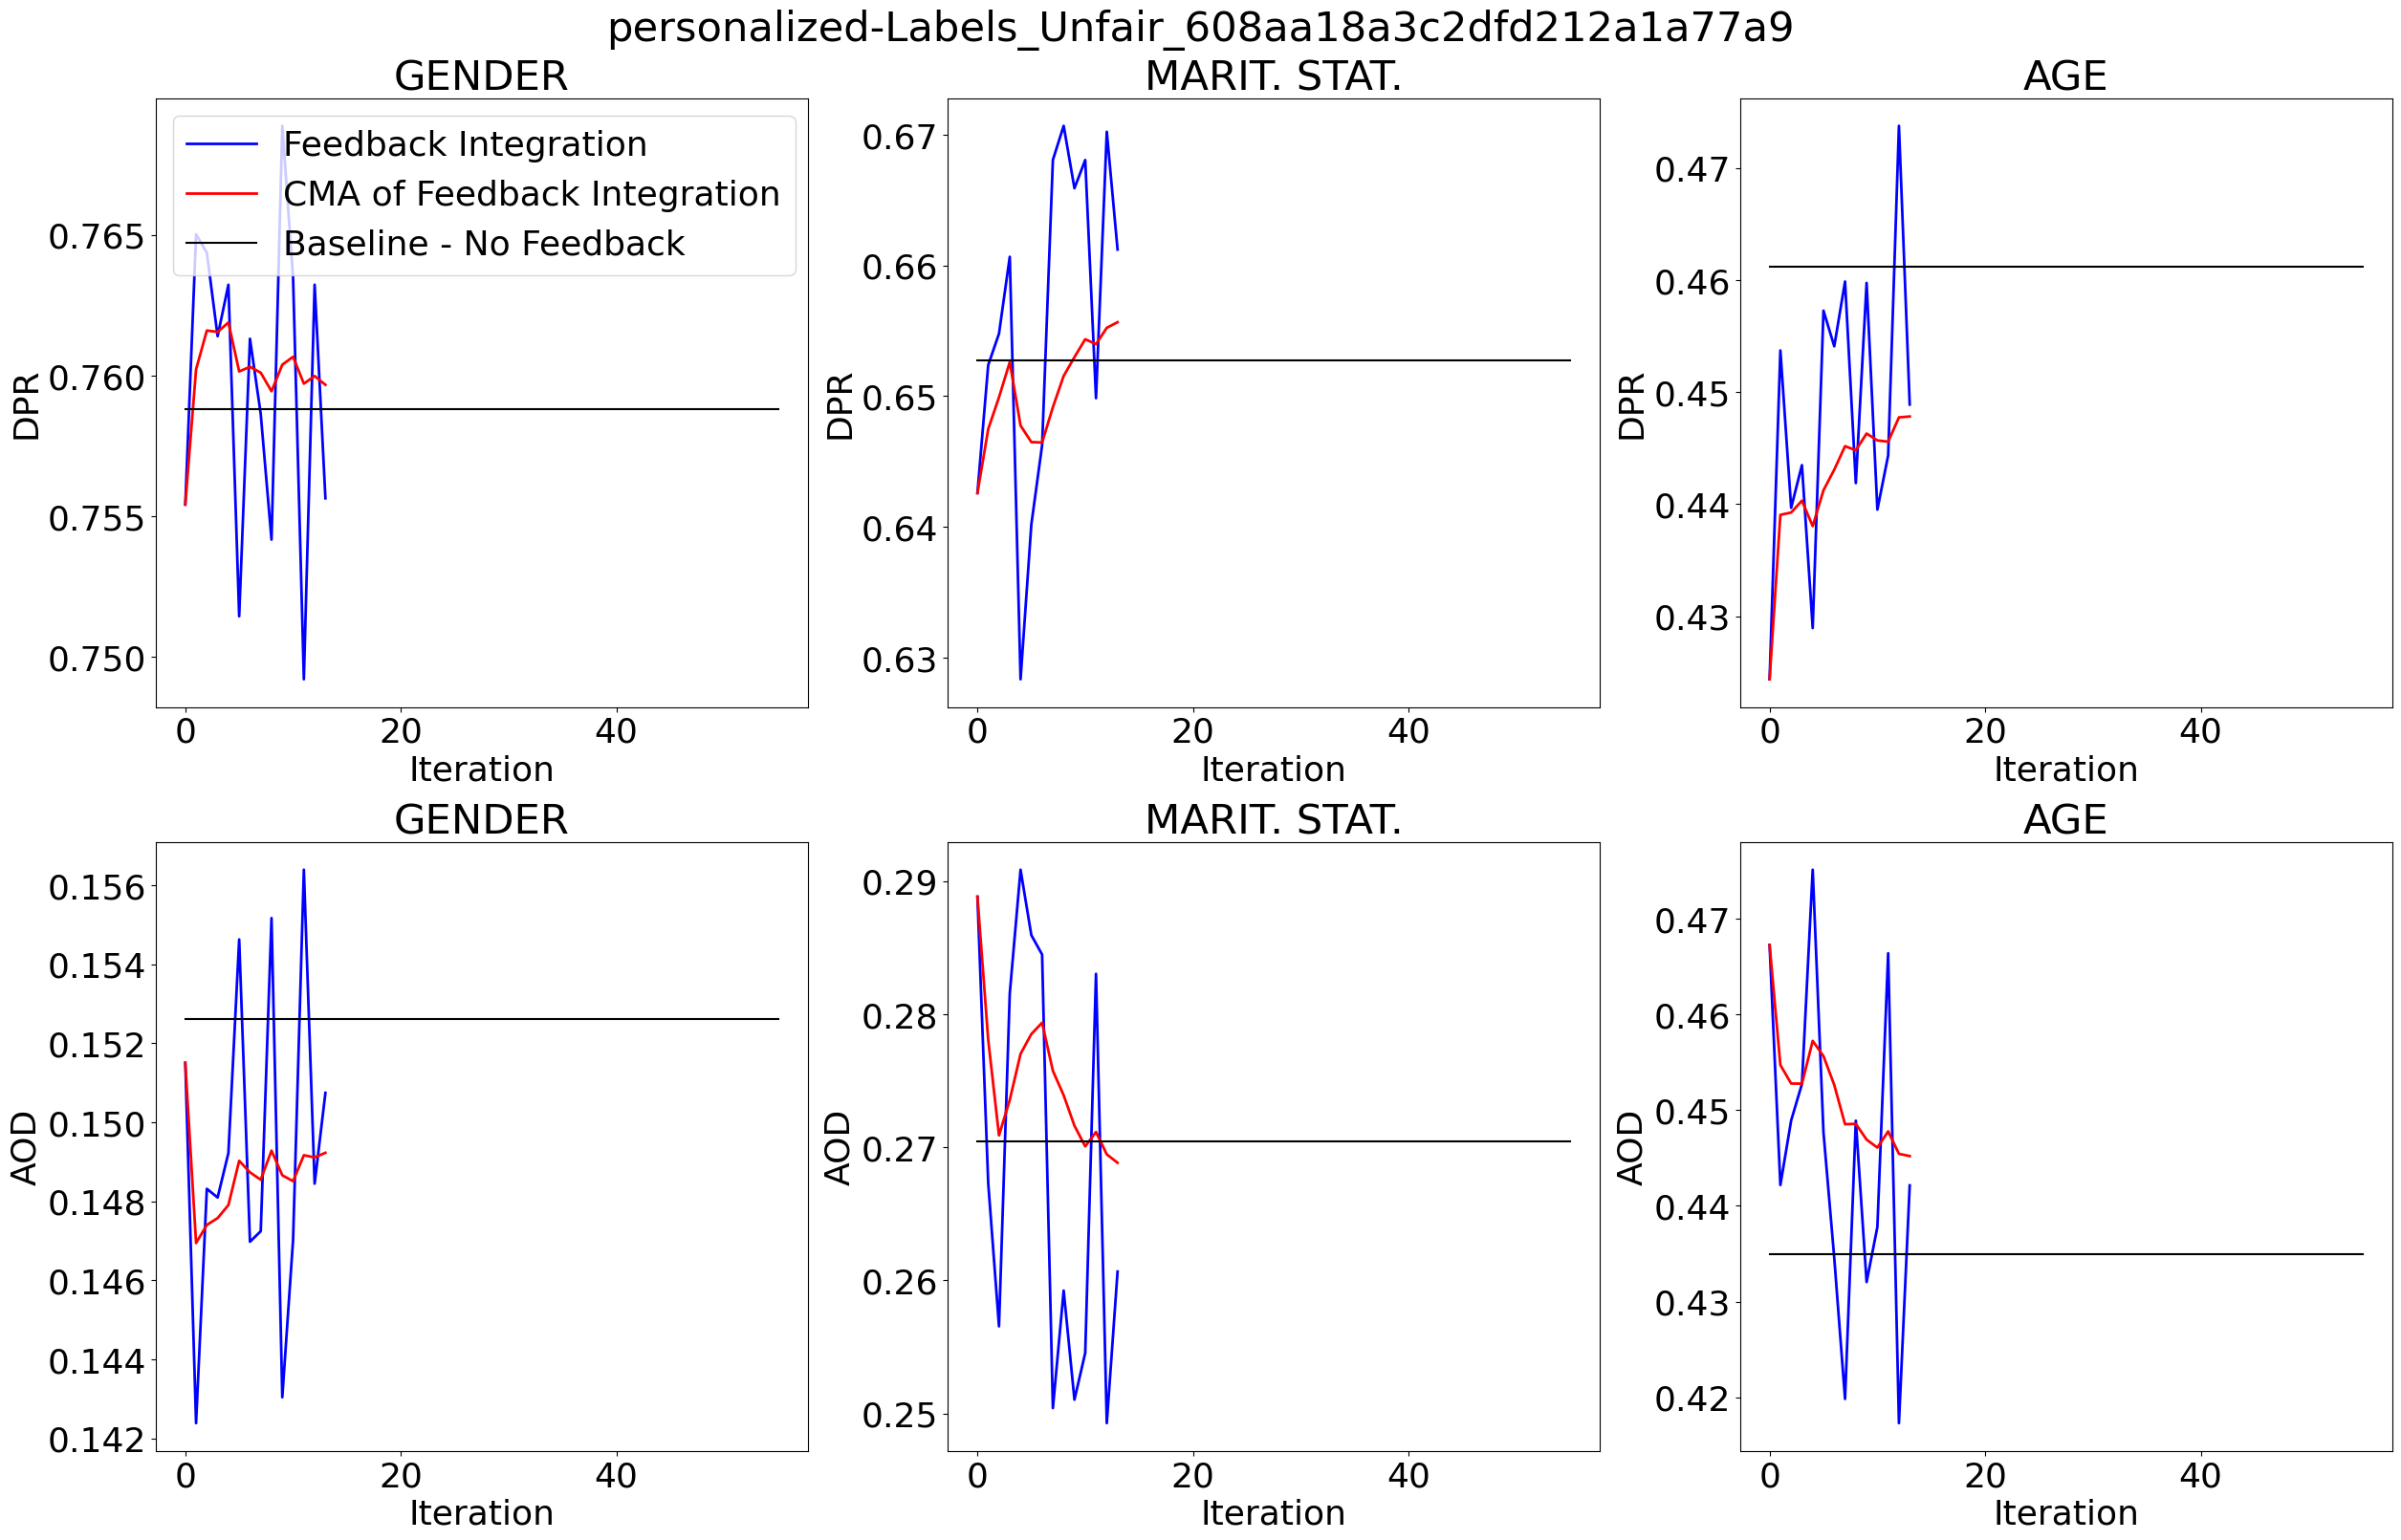

In [3]:
group_f = ['DemographicParityRatio','AverageOddsDifference']
group_fair_cod = ['DPR','AOD']
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
indiv_f = []
title = 'personalized-Labels_Unfair_{}'
fPath = folder+'data/results/personalized/Labels_Unfair/figures/'
image_type = '.pdf'
line_graphs_of_participant(title, fPath, image_type, 
                      sensitive_attrs, 
                      group_f, group_fair_cod, 
                      indiv_f, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True, '608aa18a3c2dfd212a1a77a9')

## Labels+Weights ('fair'+'unfair')

In [6]:
df_group = pd.read_csv(folder+'data/results/personalized/Labels+Weights/group_fairness_personalized-Labels+Weights_with_cma.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data/results/personalized/Labels+Weights/individual_fairness_personalized-Labels+Weights_with_cma.csv', delimiter=',')
df_acc = pd.read_csv(folder+'data/results/personalized/Labels+Weights/accuracy_personalized-Labels+Weights_with_cma.csv', delimiter=',')

perc_change_df, cma_perc_change_df = get_percentage_change_IML(df_group, group_fair, 
                                                               df_indiv, indiv_fair, 
                                                               sensitive_attrs, fs)
perc_change_df.to_csv(folder+"data/results/personalized/Labels+Weights/perc_change_personalized-Labels+Weights_raw.csv", index=False)
cma_perc_change_df.to_csv(folder+"data/results/personalized/Labels+Weights/perc_change_personalized-Labels+Weights_cma.csv", index=False)

p_ids = perc_change_df['participant_id'].tolist()

### Cluster participants based on perc. change of group fairness measured at last iteration of CMA

In [ ]:
## df to array - keep only group fairness for clustering
perc_change_array = []
for i in perc_change_df.index:
    perc_change_array.append(perc_change_df.loc[i].tolist()[:-3])
cma_perc_change_array = []
for i in cma_perc_change_df.index:
    cma_perc_change_array.append(cma_perc_change_df.loc[i].tolist()[:-3])

##
clustered_data = cma_perc_change_array
metric = 'mean'

In [ ]:
## Search for optimal number of clusters
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]
silhouette_scores, best_score, best_grid = k_means_optimize_parameter(clustered_data, parameters, metric)
plot_silhouette_scores(silhouette_scores, parameters)

In [ ]:
nc = 3
cluster_ids, cluster_centroids, array_of_vectors_pca = k_means_pca(clustered_data, nc, metric, n_components=2)
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
plot_clusters(array_of_vectors_pca, cluster_ids, colors)
##
cluster_p_id_dict = {}
for i, cl_id in enumerate(cluster_ids):
    color = 'cluster_'+str(cl_id)
    if color not in cluster_p_id_dict:
        cluster_p_id_dict[color] = []
    cluster_p_id_dict[color].append((i, p_ids[i]))
cluster_p_id_dict

In [ ]:
clustered_data_df = cma_perc_change_df.copy(deep=True)
clustered_data_df.drop(columns=['consistency_10','theil_index'],inplace=True)
clustered_data_df['cluster_id'] = cluster_ids
for i,centroid in enumerate(cluster_centroids):
    centroid = centroid.tolist()
    centroid.append('centroid')
    centroid.append(i)
    clustered_data_df.loc[58+i] = centroid
clustered_data_df.to_csv(folder+"data/results/personalized/Labels+Weights/perc_change_personalized-Labels+Weights_clustering_cma_group.csv", index=False)

In [ ]:
for cl in cluster_p_id_dict:
    print(cl,len(cluster_p_id_dict[cl]))

#### Line plots per cluster

In [ ]:
for cl in cluster_p_id_dict:
    title = 'personalized-Labels+Weights_CMA_{}'.format(cl)
    fPath = folder+'data/results/personalized/Labels+Weights/figures/clustering/'
    filename = cl
    image_type = '.jpeg'
    cl_participants = [p_id[1] for p_id in cluster_p_id_dict[cl]]
    cl_participants.append(np.nan)
    print(cl, cl_participants)
    joint_plot_all_participants(title, 
                                fPath, filename, image_type, 
                                sensitive_attrs, 
                                group_fair, group_fair_codes, 
                                indiv_fair, 
                                fs, 
                                df_group.loc[df_group['participant_id'].isin(cl_participants)], 
                                df_indiv.loc[df_indiv['participant_id'].isin(cl_participants)], 
                                df_acc.loc[df_acc['participant_id'].isin(cl_participants)], 
                                colors, True, True)

#### Perc. change graphs per cluster

In [ ]:
## plot all fairness metrics
perc_ch_df = cma_perc_change_df
cluster_df = clustered_data_df
title = 'personalized-Labels+Weights Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels+Weights_Clustering_CMA_Group_cl{}.pdf'
fPath = folder+'data/results/personalized/Labels+Weights/figures/clustering/'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','ConditionalDemographicDisparity','EqualOpportunityDifference',
                    'AverageOddsDifference','PredictiveParity']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots_per_cluster(perc_ch_df, cluster_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Perc. change plot of all participants

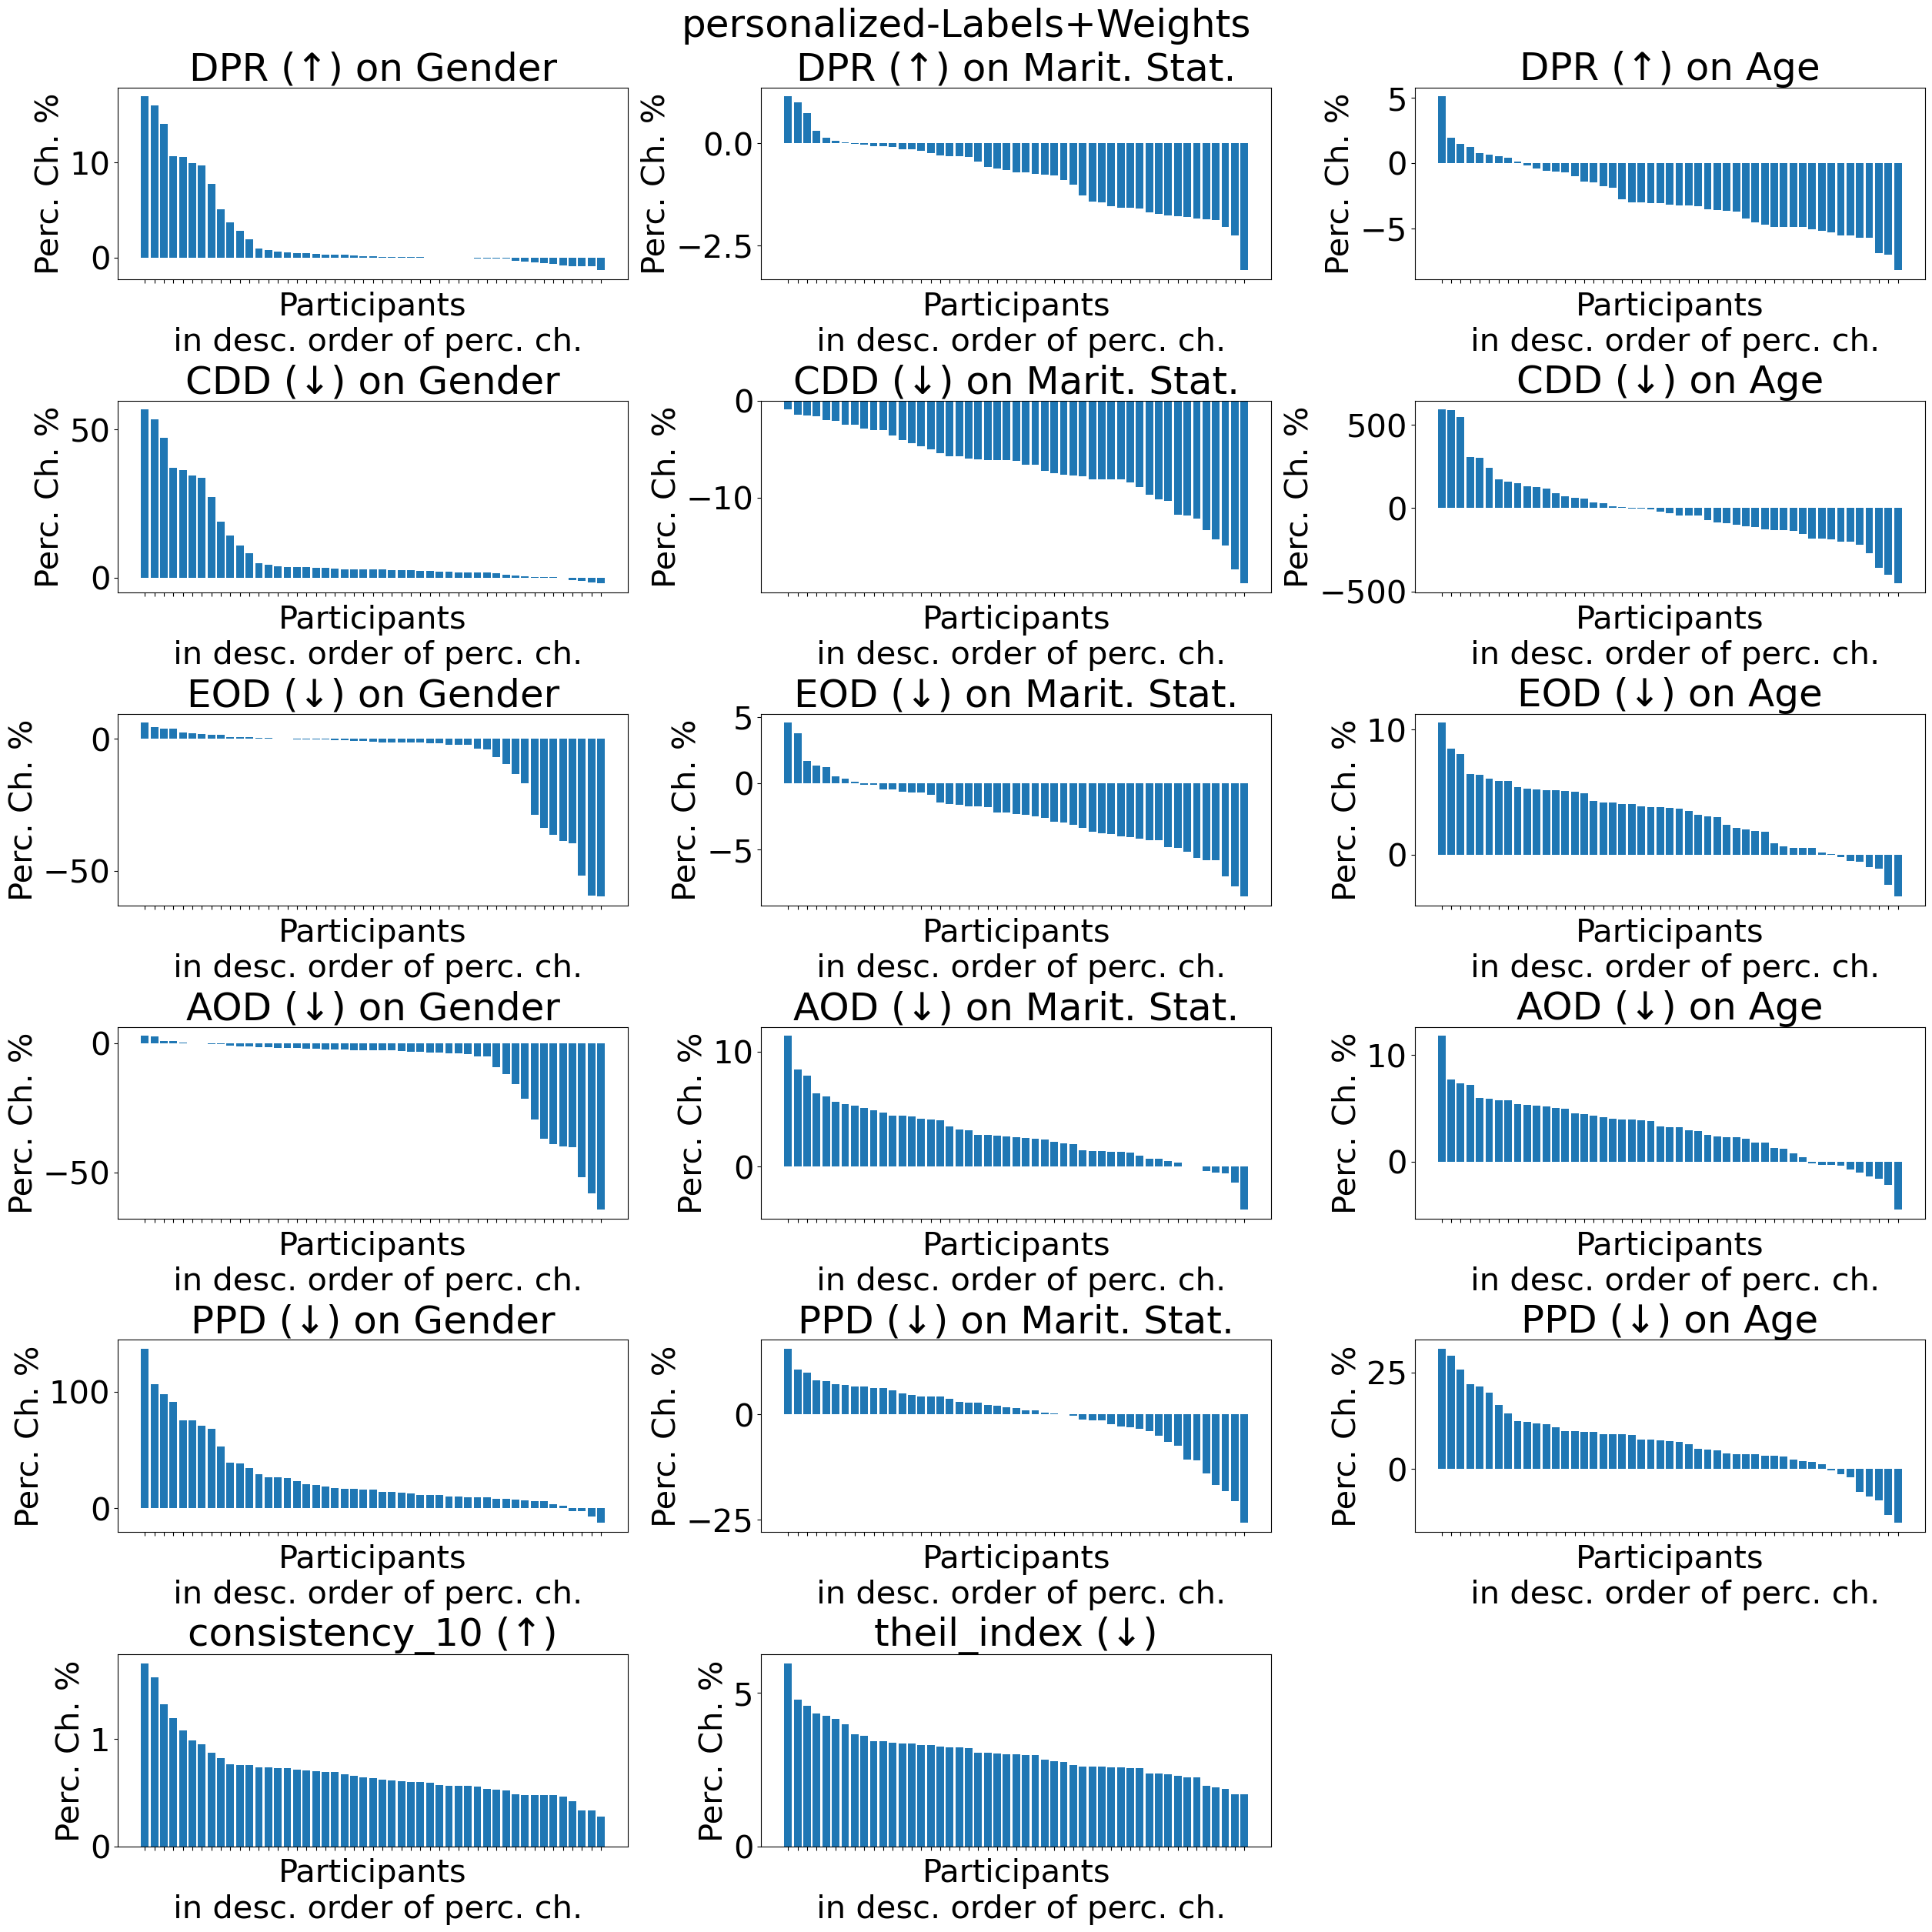

In [7]:
## plot perc. change plot for all fairness metrics
perc_ch_df = cma_perc_change_df
title = 'personalized-Labels+Weights'
file_name = 'percChange_Graphs_personalized-Labels+Weights.pdf'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','ConditionalDemographicDisparity','EqualOpportunityDifference',
                    'AverageOddsDifference','PredictiveParity','indiv.']
group_fair_cod = ['DPR (↑)','CDD (↓)','EOD (↓)','AOD (↓)','PPD (↓)']

perc_change_plots(perc_ch_df, title, file_name, fPath, attrs, attrs_codes, group_f, group_fair_cod)

### Line (Raw and CMA) plots

#### Joint plots for all participants

In [ ]:
title = 'personalized-Labels+Weights_all'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
image_type = '.jpeg'
filename = 'all_participants'
joint_plot_all_participants(title, fPath, filename, image_type, 
                            sensitive_attrs, 
                            group_fair, group_fair_codes, 
                            indiv_fair, 
                            fs, 
                            df_group, df_indiv, df_acc, 
                            colors, True, True)

#### Plots per participant

In [ ]:
title = 'personalized-Labels+Weights_{}'
fPath = folder+'data/results/personalized/Labels+Weights/figures/'
image_type = '.jpeg'
plots_per_participant(title, fPath, image_type, 
                      sensitive_attrs, 
                      group_fair, group_fair_codes, 
                      indiv_fair, 
                      fs, 
                      df_group, df_indiv, df_acc, 
                      colors, True)